### 목표
 - 500명의 키와 몸무게, 비만도 라벨을 활용하여 비만을 판단하는 모델을 만들어보자
 - 머신러닝의 과정
     1. 문제 정의
     2. 데이터 수집
     3. 데이터 전처리
     4. 탐색적 데이터 분석(EDA)
     5. 머신러닝 모델 선택, 하이퍼 파라미터(사람이 지정하는 매개변수) 조정
     6. 모델학습
     7. 모델 평가 및 예측

In [1]:
# 필요한 도구 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 모델 불러오기
from sklearn.neighbors import KNeighborsClassifier # knn 분류 모델
# 모델 성능 평가 지표 (평가 도구)
from sklearn.metrics import accuracy_score # 정확도 평가 도구

 - 데이터 준비(불러오기)

In [2]:
data = pd.read_csv('./data/bmi_500.csv')
data

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight
...,...,...,...,...
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity


In [3]:
# 1. 위에서부터 5개 출력
# DataFrame 출력 도구 : display()
display(data.head())

# 2. 밑에서부터 5개 출력
display(data.tail())

# 3. 데이터 크기 정보 확인
print(data.shape)

# 4. 데이터 차원 확인
print(data.ndim)

# 5. 데이터 정보 확인 --> (컬럼명, 컬럼개수, 행의 개수, 결측치 여부, 데이터 타입)
display(data.info())

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


,Gender,Height,Weight,Label
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity
499,Male,173,131,Extreme Obesity


(500, 4)
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


None

- 데이터 전처리

In [4]:
data.tail()

,Gender,Height,Weight,Label
495,Female,150,153,Extreme Obesity
496,Female,184,121,Obesity
497,Female,141,136,Extreme Obesity
498,Male,150,95,Extreme Obesity
499,Male,173,131,Extreme Obesity


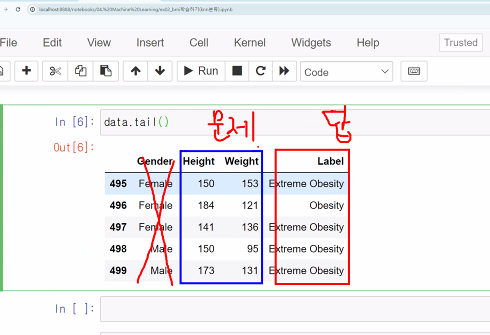

In [5]:
X = data.loc[:, ['Height', 'Weight']]  # 문제 데이터 (키, 몸무게)
# data.loc[:, ['Height':'Weight']]
y = data['Label']   # 답 (라벨)
print('문제 데이터 : ', X.shape)
print('답 데이터 : ', y.shape)

문제 데이터 :  (500, 2)
답 데이터 :  (500,)


In [6]:
# 훈련 세트와 테스트 세트로 행 분리
# 머신러닝 훈련 데이터셋
# 학습이 잘 됐는지 확인하기 위한 테스트 데이터셋
# 훈련 : 테스트 --> 7:3
# 0~349 (처음부터 350개) : train
# 350~ (350번부터 끝까지 = 150개) : test
# iloc 행분리
X_train = X.iloc[:350]
X_test = X.iloc[350:]
y_train = y.iloc[:350]
y_test = y.iloc[350:]

print('훈련 문제 : ', X_train.shape)
print('훈련 답 : ', y_train.shape)
print('테스트 문제 : ', X_test.shape)
print('테스트 답 : ', y_test.shape)

훈련 문제 :  (350, 2)
훈련 답 :  (350,)
테스트 문제 :  (150, 2)
테스트 답 :  (150,)


#### 모델링
 - 모델 객체 생성
 - 모델 학습
 - 모델 평가 및 예측

In [22]:
# 모델 생성
# n_neighbors = 3
knn_model = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
# 모델 학습
# 학습 중요 X

# 어떤 데이터를 보면서 학습하는지가 중요
# train(학습데이터)가 좋은 데이터여야만 좋은 모델이 탄생
knn_model.fit(X_train, y_train)

In [24]:
X_test

,Height,Weight
350,184,83
351,197,88
352,160,51
353,184,153
354,190,50
...,...,...
495,150,153
496,184,121
497,141,136
498,150,95


In [25]:
# 평가 및 예측
# 모델이름.predict(테스트문제)
pre = knn_model.predict(X_test)
pre

array(['Normal', 'Normal', 'Normal', 'Extreme Obesity', 'Extremely Weak',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Weak', 'Extreme Obesity',
       'Weak', 'Extreme Obesity', 'Extreme Obesity', 'Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight', 'Obesity',
       'Extreme Obesity', 'Obesity', 'Overweight', 'Extreme Obesity',
       'Weak', 'Normal', 'Obesity', 'Extreme Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Extreme Obesity', 'Weak', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Normal', 'Extreme Obesity', 'Obesity',
       'Overweight', 'Normal', 'Normal', 'Normal', 'Normal', 'Overweight',
       'Extreme Obesity', 'Overweight', 'Overweight', 'Extreme Obesity',
       'Overweight', 'Extreme Obesity', 'Overweight', 'Obesity', 'Normal',
       'Obesity', 'Obesity', 'Extreme Obesity', 'Normal',
       'Extreme Obesity', 'Extreme Obesity', 'Extreme Obesity', 'Weak',
       'Obesity', 'Extreme Obes

In [26]:
# 평가를 할 도구 = score
knn_model.score(X_test, y_test)

0.94

In [27]:
# accuracy_score를 사용해서 평가
# 실제 값과 pre(예측값)이 어느 정도 맞아떨어지는지 확인
# 정확도 평가 지표
# accuracy_score(실제답, 예측값)
accuracy_score(y_test, pre) * 100   # 90.0%

94.0

In [ ]:
# 정확도를 올리려면??
# 1. 다양한 문제를 접하도록
# 2. 문제가 한정되어있을 경우 -> 특성에 해당하는 것을 바꿈
#    -> knn_model = KNeighborsClassifier(n_neighbors = 3)에서 n_neighbors의 숫자를 바꾸기

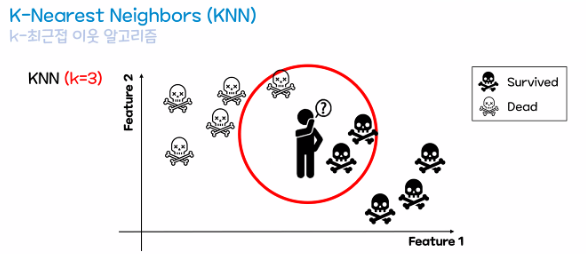

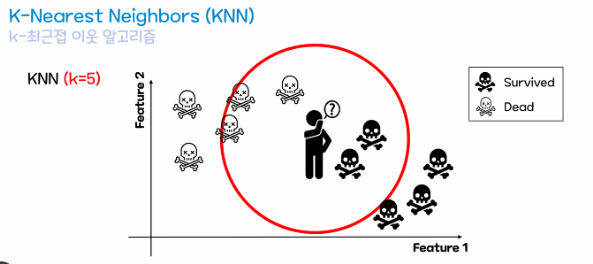

- 주변 이웃을 3명 보다가 5명으로 바꾸겠다
- => 죽을 확률 높음.
- => 이웃을 몇 명 설정하느냐에 따라서 예측이 달라짐